In [ ]:
"""
import pandas as pd
url = "https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20250415&stockNo=0050&response=html"
df=pd.read_html(url)[0]
df
"""

'\nimport pandas as pd\nurl = "https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date=20250415&stockNo=0050&response=html"\ndf=pd.read_html(url)[0]\ndf\n'

In [ ]:
!wget -O NotoSansCJKtc-Regular.otf https://github.com/googlefonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true

--2025-04-28 06:19:51--  https://github.com/googlefonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true
Resolving github.com (github.com)... 140.82.112.3
Connecting to github.com (github.com)|140.82.112.3|:443... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: https://github.com/notofonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true [following]
--2025-04-28 06:19:51--  https://github.com/notofonts/noto-cjk/blob/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf?raw=true
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/notofonts/noto-cjk/raw/refs/heads/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf [following]
--2025-04-28 06:19:51--  https://github.com/notofonts/noto-cjk/raw/refs/heads/main/Sans/OTF/TraditionalChinese/NotoSansCJKtc-Regular.otf
Reusing existing connection to github.com:4

In [ ]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.font_manager.fontManager.addfont("NotoSansCJKtc-Regular.otf")
plt.rcParams["font.sans-serif"] = ["Noto Sans CJK TC"]
plt.rcParams["axes.unicode_minus"] = False


In [ ]:
import pandas as pd

def get_stock_data(date, stock_no):
    url = f"https://www.twse.com.tw/rwd/zh/afterTrading/STOCK_DAY?date={date}&stockNo={stock_no}&response=html"
    df_mth = pd.read_html(url,header=1)[0]
    return df_mth
date_range = pd.date_range(start='20240401', end='20250401', freq='MS')
date_list = date_range.strftime('%Y%m%d').to_list()
df = pd.DataFrame()
for date in date_list:
    df = pd.concat([df, get_stock_data(date,'0050')], ignore_index=True)
df

,日期,成交股數,成交金額,開盤價,最高價,最低價,收盤價,漲跌價差,成交筆數
0,113/04/01,5727780,904051439,158.20,158.75,157.25,157.40,-0.5,9814
1,113/04/02,7924481,1261718566,158.45,159.65,158.40,159.65,2.25,11341
2,113/04/03,5042947,799119313,158.65,158.90,157.80,158.55,-1.1,10098
3,113/04/08,6124837,976164820,158.65,159.85,158.55,159.45,0.9,12306
4,113/04/09,9043462,1465418271,160.00,163.35,159.90,163.25,3.8,15355
...,...,...,...,...,...,...,...,...,...
254,114/04/22,21039511,3298295836,157.55,157.90,155.95,155.95,-2.65,55872
255,114/04/23,16545775,2677643864,160.30,163.10,160.30,162.85,6.9,26829
256,114/04/24,14351450,2335488916,163.90,164.05,161.30,161.90,-0.95,29832
257,114/04/25,18651089,3100147680,166.20,166.95,165.50,165.75,3.85,31456


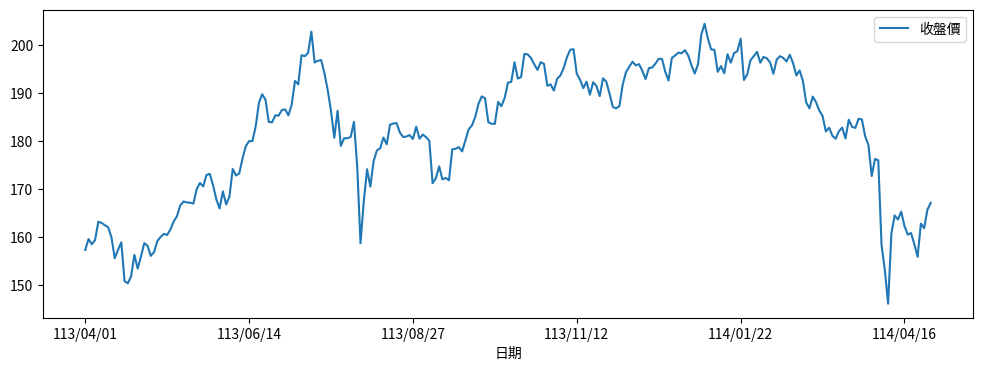

In [ ]:
df.plot(kind="line" , x="日期" , y="收盤價" , figsize=(12,4))
plt.show()

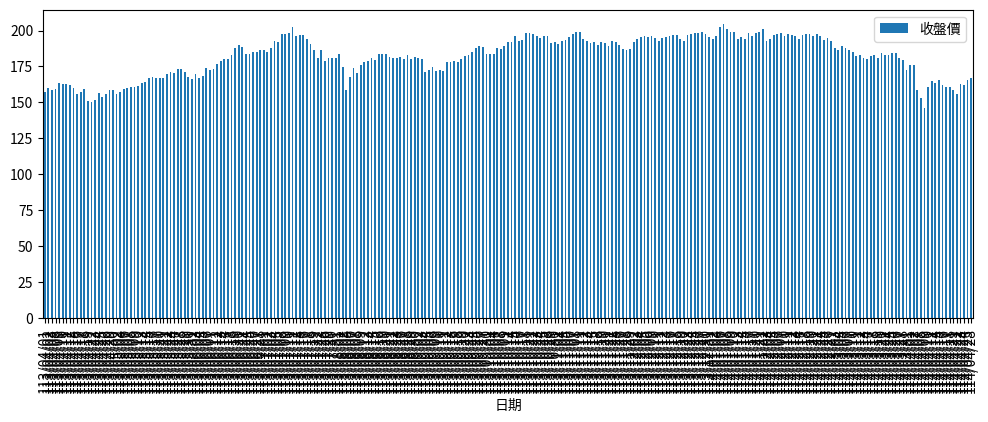

In [ ]:
df.plot(kind="bar" , x="日期" , y="收盤價" , figsize=(12,4))
plt.show()

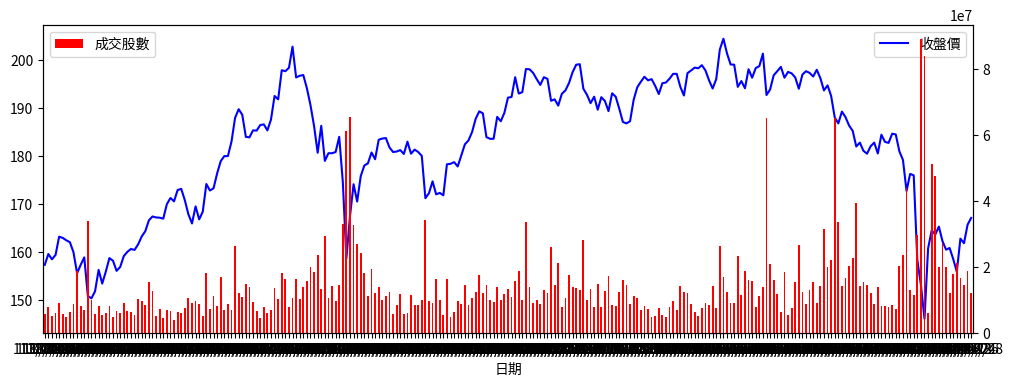

In [ ]:
import matplotlib.pyplot as plt

fig, ax1 = plt.subplots(figsize=(12, 4))

df.plot(kind='line', x='日期', y='收盤價', ax=ax1, color='blue')

ax2 = ax1.twinx()
df.plot(kind='bar', x='日期', y='成交股數', ax=ax2, color='red')

plt.show()


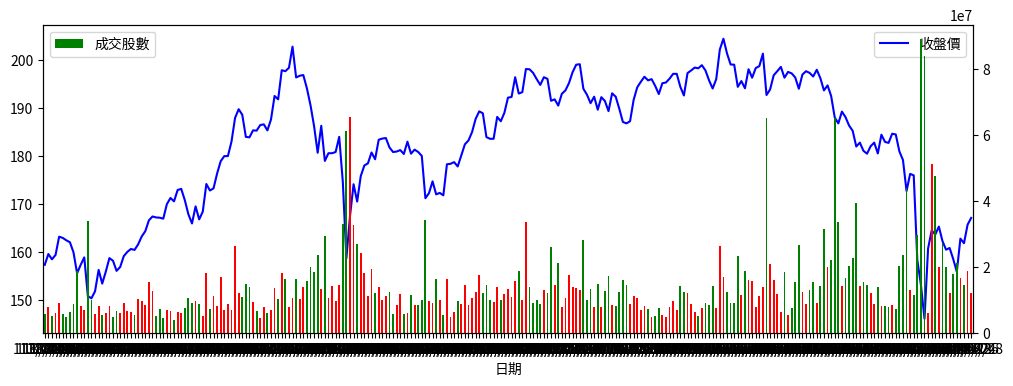

In [ ]:
df['漲跌價差'] = pd.to_numeric(df['漲跌價差'], errors='coerce')

df['Color'] = df['漲跌價差'].apply(lambda x: 'green' if x < 0 else 'red')
fig, ax1 = plt.subplots(figsize=(12, 4))
df.plot(kind='line', x='日期', y='收盤價', ax=ax1, color='blue')
ax2 = ax1.twinx()
df.plot(kind='bar', x='日期', y='成交股數', ax=ax2, color=df['Color'])

plt.show()